In [1]:
import pandas as pd 
import ucimlrepo

In [2]:
data  = ucimlrepo.fetch_ucirepo(id=2)

In [3]:
data.data.targets.shape

(48842, 1)

In [4]:
data.data.features.shape 

(48842, 14)

In [5]:
# metadata 
print(data.metadata) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [6]:
data.variables.head(20) 

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [7]:
def set_target(value):
    if value.strip().upper() == "<=50K" or value.strip().upper() == "<=50K.":
        return 0
    else:
        return 1

In [8]:
final_dataset = pd.concat([data.data.features,  data.data.targets], axis = 1)
final_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
final_dataset['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [11]:
final_dataset['class'] = final_dataset['income'].apply(set_target)
final_dataset.drop(['income', 'education'], axis = 1, inplace = True)

In [12]:
final_dataset.head(20)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [13]:
final_dataset.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
class               0
dtype: int64

In [14]:
final_dataset = final_dataset.dropna()
print(final_dataset.shape)
final_dataset.isnull().sum()

(47621, 14)


age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [15]:
final_dataset.to_csv("adult_dataset_final.csv", index=False)

In [16]:
df = pd.read_csv('adult_dataset_final.csv')
df.shape

(47621, 14)

## lets  create the training data and label encoding  for categorical columns 

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


def encode_categorical_columns(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
        print(f"Mapping for column '{column}':")
        for class_, val in zip(le.classes_, le.transform(le.classes_)):
            print(f"  {class_} -> {val}")
    return df, label_encoders

df_encoded, label_encoders  = encode_categorical_columns(df)

Mapping for column 'workclass':
  ? -> 0
  Federal-gov -> 1
  Local-gov -> 2
  Never-worked -> 3
  Private -> 4
  Self-emp-inc -> 5
  Self-emp-not-inc -> 6
  State-gov -> 7
  Without-pay -> 8
Mapping for column 'marital-status':
  Divorced -> 0
  Married-AF-spouse -> 1
  Married-civ-spouse -> 2
  Married-spouse-absent -> 3
  Never-married -> 4
  Separated -> 5
  Widowed -> 6
Mapping for column 'occupation':
  ? -> 0
  Adm-clerical -> 1
  Armed-Forces -> 2
  Craft-repair -> 3
  Exec-managerial -> 4
  Farming-fishing -> 5
  Handlers-cleaners -> 6
  Machine-op-inspct -> 7
  Other-service -> 8
  Priv-house-serv -> 9
  Prof-specialty -> 10
  Protective-serv -> 11
  Sales -> 12
  Tech-support -> 13
  Transport-moving -> 14
Mapping for column 'relationship':
  Husband -> 0
  Not-in-family -> 1
  Other-relative -> 2
  Own-child -> 3
  Unmarried -> 4
  Wife -> 5
Mapping for column 'race':
  Amer-Indian-Eskimo -> 0
  Asian-Pac-Islander -> 1
  Black -> 2
  Other -> 3
  White -> 4
Mapping for colu

In [18]:
import pickle
def save_label_encoders(encoders, filepath):
    with open(filepath, 'wb') as file:
        pickle.dump(encoders, file)
    print(f"Label encoders saved to {filepath}")

def load_label_encoders(filepath):
    with open(filepath, 'rb') as file:
        encoders = pickle.load(file)
    print(f"Label encoders loaded from {filepath}")
    return encoders


## Save all the label encoders for future analysis

In [19]:
save_label_encoders(label_encoders, 'label_encoders.pkl')

# Load the label encoders from the file
loaded_encoders = load_label_encoders('label_encoders.pkl')

for key, value in label_encoders.items():
    print(f"Mapping for column '{key}':")
    for class_, val in zip(value.classes_, value.transform(value.classes_)):
        print(f"  {class_} -> {val}")
    

Label encoders saved to label_encoders.pkl
Label encoders loaded from label_encoders.pkl
Mapping for column 'workclass':
  ? -> 0
  Federal-gov -> 1
  Local-gov -> 2
  Never-worked -> 3
  Private -> 4
  Self-emp-inc -> 5
  Self-emp-not-inc -> 6
  State-gov -> 7
  Without-pay -> 8
Mapping for column 'marital-status':
  Divorced -> 0
  Married-AF-spouse -> 1
  Married-civ-spouse -> 2
  Married-spouse-absent -> 3
  Never-married -> 4
  Separated -> 5
  Widowed -> 6
Mapping for column 'occupation':
  ? -> 0
  Adm-clerical -> 1
  Armed-Forces -> 2
  Craft-repair -> 3
  Exec-managerial -> 4
  Farming-fishing -> 5
  Handlers-cleaners -> 6
  Machine-op-inspct -> 7
  Other-service -> 8
  Priv-house-serv -> 9
  Prof-specialty -> 10
  Protective-serv -> 11
  Sales -> 12
  Tech-support -> 13
  Transport-moving -> 14
Mapping for column 'relationship':
  Husband -> 0
  Not-in-family -> 1
  Other-relative -> 2
  Own-child -> 3
  Unmarried -> 4
  Wife -> 5
Mapping for column 'race':
  Amer-Indian-Eski

## save the encoded dataframe

In [20]:
df_encoded.to_csv("encoded_adult_dataset.csv")

## lets create and save train and test split for training

In [21]:
from sklearn.model_selection import train_test_split

def split_and_save_data(df, test_size=0.2, train_filepath='train.csv', test_filepath='test.csv', random_state=10):
    # Split the DataFrame into training and testing sets
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # Save the training set to a CSV file
    train_df.to_csv(train_filepath, index=False)
    print(f"Training data saved to {train_filepath}")
    
    # Save the testing set to a CSV file
    test_df.to_csv(test_filepath, index=False)
    print(f"Testing data saved to {test_filepath}")
    
    return train_df, test_df

train_df, test_df = split_and_save_data(df_encoded)


Training data saved to train.csv
Testing data saved to test.csv


In [22]:
print("shape of training data", train_df.shape)
print("shape of testing data", test_df.shape)

shape of training data (38096, 14)
shape of testing data (9525, 14)


## lets look at the bounds for each column

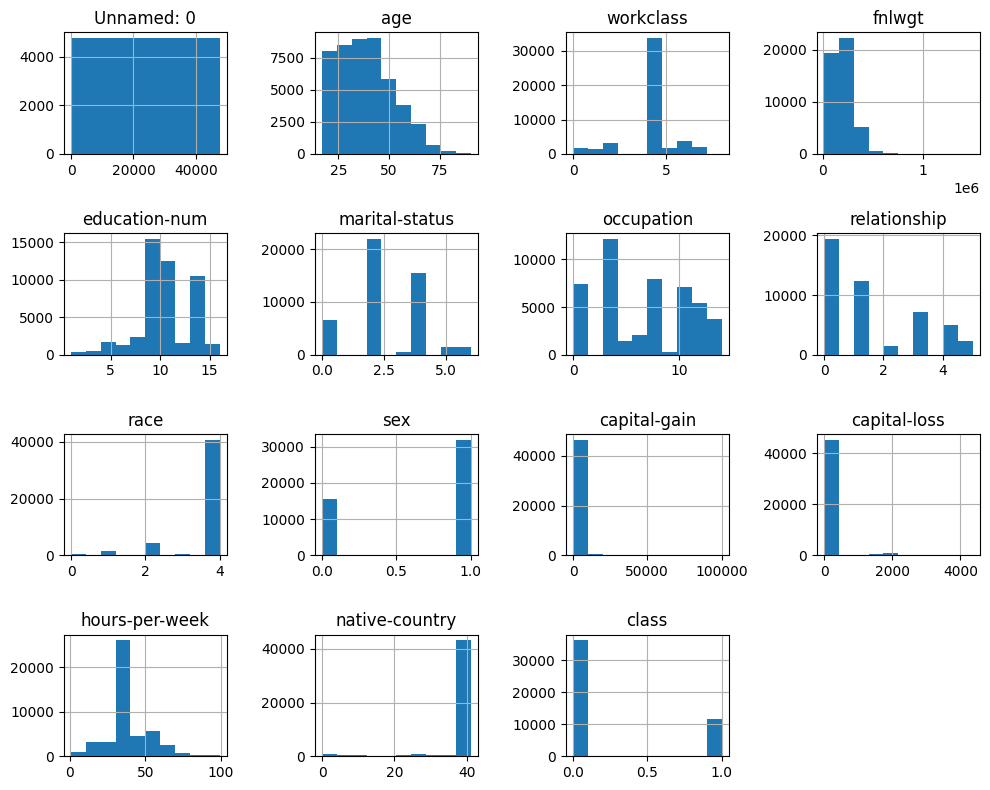

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

df_encoded = pd.read_csv("encoded_adult_dataset.csv")


df_encoded.hist(bins=10, figsize=(10, 8))


plt.tight_layout()
plt.show()

In [24]:
df_encoded.describe()

,Unnamed: 0,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,47621.000000,47621.000000,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000
mean,23810.000000,38.640684,3.946893,1.897271e+05,10.090821,2.606602,6.704395,1.432141,3.671489,0.670650,1091.137649,87.853489,40.600050,36.946284,0.242351
std,13747.142921,13.558961,1.371859,1.055695e+05,2.568320,1.505946,4.168429,1.601278,0.842198,0.469982,7487.228336,404.010612,12.260345,7.311473,0.428510
min,0.000000,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,11905.000000,28.000000,4.000000,1.175840e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,23810.000000,37.000000,4.000000,1.782820e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,35715.000000,48.000000,4.000000,2.377200e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,47620.000000,90.000000,8.000000,1.490400e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [25]:
df_encoded[df_encoded['class'] == 1].shape

(11541, 15)

In [26]:
df_encoded[df_encoded['class'] == 0].shape

(36080, 15)

In [27]:
def balance_dataset(df, column_name):
    # Find the size of the smallest class
    min_class_size = df[column_name].value_counts().min()
    
    # Sample from each class to get an equal number of rows
    balanced_df = df.groupby(column_name).apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)
    
    return balanced_df

balanced_df = balance_dataset(df_encoded, 'class')

In [28]:
balanced_df[balanced_df['class'] == 1].shape

(11541, 15)

In [29]:
balanced_df[balanced_df['class'] == 0].shape

(11541, 15)

In [30]:
balanced_df.describe()

,Unnamed: 0,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,23082.000000,23082.000000,23082.000000,2.308200e+04,23082.000000,23082.000000,23082.000000,23082.000000,23082.000000,23082.000000,23082.000000,23082.000000,23082.000000,23082.000000,23082.000000
mean,23871.398666,40.532363,3.972316,1.885893e+05,10.586431,2.428862,6.878433,1.177714,3.711593,0.735032,2097.032060,123.460879,42.232865,36.990815,0.500000
std,13785.948382,12.908271,1.377987,1.043220e+05,2.628773,1.332859,4.138952,1.621327,0.802737,0.441326,10624.475754,479.537981,12.079756,7.301631,0.500011
min,0.000000,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,11897.250000,31.000000,4.000000,1.173810e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,24004.000000,40.000000,4.000000,1.769950e+05,10.000000,2.000000,7.000000,0.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.500000
75%,35812.750000,49.000000,4.000000,2.352980e+05,13.000000,4.000000,10.000000,2.000000,4.000000,1.000000,0.000000,0.000000,50.000000,39.000000,1.000000
max,47620.000000,90.000000,8.000000,1.455435e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [31]:
balanced_df.drop(['Unnamed: 0'], axis=1, inplace=True)
balanced_df.to_csv('balanced_adult_dataset.csv', index=False)

In [32]:
train_df_b, test_df_b = split_and_save_data(balanced_df, train_filepath='train_balanced.csv', test_filepath='test_balanced.csv')

Training data saved to train_balanced.csv
Testing data saved to test_balanced.csv


In [33]:
train_df_b.shape, test_df_b.shape

((18465, 14), (4617, 14))

In [34]:
train_df_b.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1359,58,4,169611,9,2,1,5,4,0,0,0,40,39,0
11790,76,5,99328,13,2,5,0,4,1,6514,0,40,39,1
12413,53,4,172962,15,2,10,0,4,1,0,0,40,39,1
16511,30,4,205950,10,2,7,0,4,1,0,0,40,39,1
14831,50,2,68898,16,2,4,0,4,1,0,0,55,39,1
